<a href="https://colab.research.google.com/github/triductran00/DeepLearning/blob/main/MultiLayerNet_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/MultiLayerNet-GPU

/content/drive/MyDrive/MultiLayerNet-GPU


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
epoch:0, train acc:0.116, test acc:0.1067
epoch:1, train acc:0.29133333333333333, test acc:0.2724
epoch:2, train acc:0.4666666666666667, test acc:0.4312
epoch:3, train acc:0.6226666666666667, test acc:0.5817
epoch:4, train acc:0.7103333333333334, test acc:0.6786
epoch:5, train acc:0.7653333333333333, test acc:0.7312
epoch:6, train acc:0.7926666666666666, test acc:0.753
epoch:7, train acc:0.8123333333333334, test acc:0.7811
epoch:8, train acc:0.8226666666666667, test acc:0.7981
epoch:9, train acc:0.8403333333333334, test acc:0.8093
epoch:10, train acc:0.8483333333333334, test acc:0.8198
epoch:11, train acc:0.8623333333333333, test acc:0.8324
epoch:12, train acc:0.867, test acc:0.8388
epoch:13, train acc:0.873666666

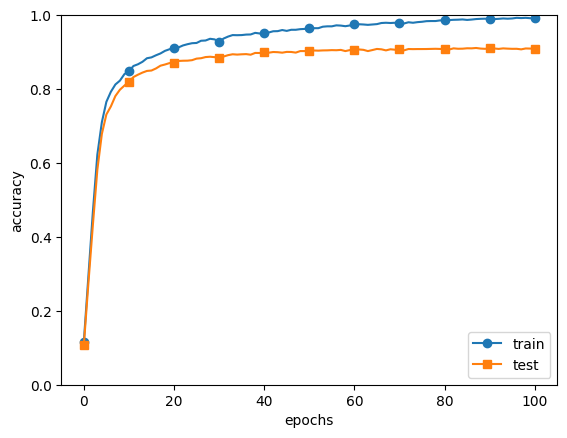

In [ ]:
# coding: utf-8
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net import MultiLayerNet
from optimizer import *
import cupy as np

# 0:Load MNIST data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

x_train = x_train[:3000]
t_train = t_train[:3000]


# 1:Settings
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 101
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
max_iter = int(max_epochs * iter_per_epoch)
epoch_cnt = 0


for i in range(max_iter):
    batch_mask = np.random.choice(train_size, batch_size).get()
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(np.asarray(x_batch), np.asarray(t_batch))
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(np.asarray(x_train), np.asarray(t_train))
        test_acc = network.accuracy(np.asarray(x_test), np.asarray(t_test))
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# plotting
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x.get(), np.asarray(train_acc_list).get(), marker='o', label='train', markevery=10)
plt.plot(x.get(), np.asarray(test_acc_list).get(), marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
